# **Multi-inference implicit chain of reasoning demonstration**

Here I attempt to solve this challenge [here](https://yuntiandeng.com/cv/challenge.png) by referencing the research paper and source code linked below.

| ||
|----------|----------|
| Research Credit | [here](https://arxiv.org/pdf/2311.01460.pdf) |
| Code Inspiration Credit | [github](https://github.com/da03/implicit_chain_of_thought/tree/main) |

In [1]:
import sys
import os

#For safe imports
notebook_directory = os.getcwd()
parent_directory = os.path.dirname(notebook_directory)
sys.path.insert(False, parent_directory)


In [2]:
parent_directory = os.path.dirname(notebook_directory)

### **Dataset Generation**
Here we generate our test and train data. We generate our training data randomly such that it represents less than **1%** of possible observations. We also generate our tokenized data here as well.

---

The format of training and test datasets follow this format:

```
[input 1a] $$$ [input 1b]||[CoT 1a] $$$ [CoT 1b] #### [output 1a] $$$ [output 1b]
[input 2a] $$$ [input 2b]||[CoT 2a] $$$ [CoT 2b] #### [output 2a] $$$ [output 2b]
[input 3a] $$$ [input 3b]||[CoT 3a] $$$ [CoT 3b] #### [output 3a] $$$ [output 3b]
```

We can also test any particular case using the DatasetHandler. We create a custom prediction dataset as well.

In [3]:
from data.data import DatasetHandler
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')

training_data_size = 777
test_data_size = 77

datahandler_train = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'train')
datahandler_test = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'test')

Now we generate datasets for each handler.

In [4]:
datahandler_train.generateDataset(size = training_data_size)
datahandler_test.generateDataset(size = test_data_size)

Generated raw train dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_train_dataset.txt of size 777.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_train_dataset.txt
tgt_avg:  21.0
src_avg:  13.0
ratios:  0.6190476190476191
tgt_avg:  15.0
src_avg:  13.0
ratios:  0.8666666666666667
---------------------------
Example features:
Full entry:  4 5 * 6 3 $$$ 5 3 * 0 8 <|endoftext|> 4 2 3 + 0 2 6 1 $$$ 0 0 0 + 0 0 8 2 <|endoftext|> #### 4 4 9 1 $$$ 0 0 8 2 <|endoftext|>
No CoT:  4 5 * 6 3 $$$ 5 3 * 0 8 <|endoftext|> #### 4 4 9 1 $$$ 0 0 8 2 <|endoftext|>
Only CoT:  4 5 * 6 3 $$$ 5 3 * 0 8 <|endoftext|> 4 2 3 + 0 2 6 1 $$$ 0 0 0 + 0 0 8 2 <|endoftext|>
Product input:  4 5 * 6 3 $$$ 5 3 * 0 8 <|endoftext|> 
---------------------------
Generated raw test dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_test_dataset.txt of size 77.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_test_dataset.

Here we allow the creation of a custom prediction. The custom prediction is of the form **a*b** and **c*d**.

In [5]:
#Custom prediction 
a=10
b=5
c=9
d=98

custom_prediction = DatasetHandler(tokenizer = tokenizer, parent_path = parent_directory, max_len = 1024, type = 'custom')
custom_prediction.generateDataset(a=10, b=5, c=9, d=98)

Generated raw custom dataset saved at c:\Users\Luke\multi_implicit_cot\data\raw_custom_dataset.txt of size 1.
Creating tokenized features from dataset file at c:\Users\Luke\multi_implicit_cot\data\raw_custom_dataset.txt
tgt_avg:  21.0
src_avg:  13.0
ratios:  0.6190476190476191
tgt_avg:  15.0
src_avg:  13.0
ratios:  0.8666666666666667
---------------------------
Example features:
Full entry:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0 <|endoftext|> #### 0 5 0 0 $$$ 2 8 8 0 <|endoftext|>
No CoT:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> #### 0 5 0 0 $$$ 2 8 8 0 <|endoftext|>
Only CoT:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0 <|endoftext|>
Product input:  0 1 * 5 0 $$$ 9 0 * 8 9 <|endoftext|> 
---------------------------


### **Model Training**
Here we begin training our individual models.

---


In [6]:
from source.teacher import Teacher
from source.configurations import TeacherConfig

from source.thought_emulator import ThoughtEmulator
from source.configurations import ThoughtEmulatorConfig

from source.mindreading_emulator import MindReadingEmulator
from source.configurations import MindReadingEmulatorConfig


ImportError: cannot import name 'MindReaderEmulatorConfig' from 'source.configurations' (c:\Users\Luke\multi_implicit_cot\source\configurations.py)

In [ ]:
teacher_config = TeacherConfig()
teacher_model = Teacher(teacher_config)

t_emulator_config = ThoughtEmulatorConfig()
t_emulator_model = ThoughtEmulator(t_emulator_config, teacher_model)

mr_emulator_config = MindReadingEmulatorConfig()
mr_emulator_model = MindReadingEmulator(t_emulator_config, teacher_model)

##### **Teacher Model**
This model takes in inputs and generates a CoT and product as output.

  4%|▍         | 1/25 [00:01<00:35,  1.47s/it]

Step: 0. PPL: 91.086479. Training Accuracy: 0.193015


 12%|█▏        | 3/25 [00:02<00:12,  1.72it/s]

Step: 2. PPL: 19.449072. Training Accuracy: 0.284926


 20%|██        | 5/25 [00:02<00:08,  2.36it/s]

Step: 4. PPL: 10.288027. Training Accuracy: 0.352022


 28%|██▊       | 7/25 [00:03<00:06,  2.71it/s]

Step: 6. PPL: 7.558305. Training Accuracy: 0.375919


 36%|███▌      | 9/25 [00:04<00:05,  2.89it/s]

Step: 8. PPL: 5.846033. Training Accuracy: 0.441176


 44%|████▍     | 11/25 [00:04<00:04,  2.99it/s]

Step: 10. PPL: 5.238699. Training Accuracy: 0.465074


 52%|█████▏    | 13/25 [00:05<00:03,  3.04it/s]

Step: 12. PPL: 4.860101. Training Accuracy: 0.488051


 60%|██████    | 15/25 [00:06<00:03,  3.06it/s]

Step: 14. PPL: 4.376841. Training Accuracy: 0.531250


 68%|██████▊   | 17/25 [00:06<00:02,  3.08it/s]

Step: 16. PPL: 4.251329. Training Accuracy: 0.522059


 76%|███████▌  | 19/25 [00:07<00:01,  3.10it/s]

Step: 18. PPL: 3.899797. Training Accuracy: 0.574449


 84%|████████▍ | 21/25 [00:07<00:01,  3.09it/s]

Step: 20. PPL: 3.829326. Training Accuracy: 0.574449


 92%|█████████▏| 23/25 [00:08<00:00,  3.09it/s]

Step: 22. PPL: 3.560847. Training Accuracy: 0.592831


100%|██████████| 25/25 [00:09<00:00,  2.74it/s]


Step: 24. PPL: 3.462947. Training Accuracy: 0.607843
Evaluating test dataset now...


 33%|███▎      | 1/3 [00:00<00:01,  1.96it/s]

Input:  6 2 * 3 8 $$$ 9 7 * 4 2 
Target:  8 7 0 + 0 8 0 2 $$$ 6 1 3 + 0 8 5 1  #### 8 5 1 2 $$$ 6 9 8 1 
Predicted:  0 0 0 + 0 0 0 0 0 $$$ 0 0 0 + 0 0 0 0  #### 0 0 0 0 $$$ 0 0 0 0 



 67%|██████▋   | 2/3 [00:01<00:00,  1.97it/s]

Input:  7 9 * 5 3 $$$ 4 6 * 1 6 
Target:  5 8 4 + 0 1 9 2 $$$ 4 6 0 + 0 4 8 3  #### 5 9 3 3 $$$ 4 0 9 3 
Predicted:  4 6 9 + 0 4 6 0 $$$ 4 6 + 0 6 0 0  #### 4 6 0 $$$ 4 6 0 



100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

Input:  5 1 * 3 4 $$$ 7 7 * 6 4 
Target:  5 4 0 + 0 0 6 0 $$$ 2 6 4 + 0 8 0 3  #### 5 4 6 0 $$$ 2 4 5 3 
Predicted:  0 0 0 + 0 0 0 0 0 $$$ 0 0 0 + 0 0 0 0  #### 0 0 0 0 $$$ 0 0 0 0 

Perplexitity: 3.021701; Test Accuracy: 0.000000; Training Accuracy: 0.637510.
Saving to c:\Users\Luke\multi_implicit_cot\models\teacher


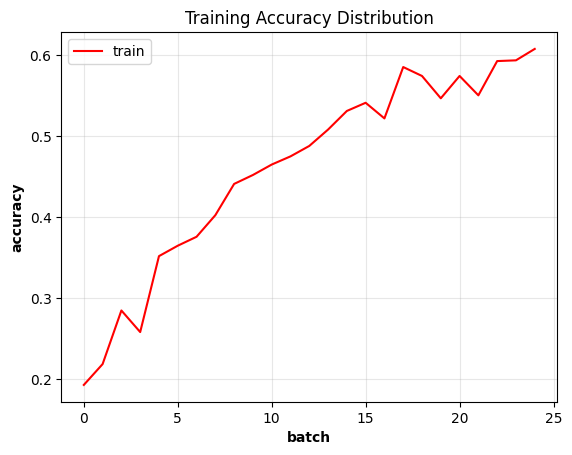

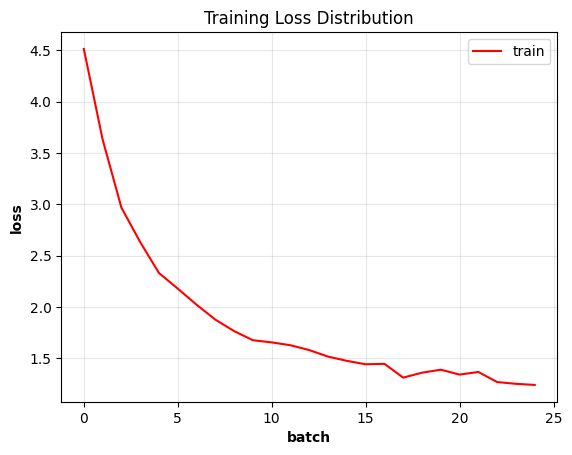

In [ ]:
teacher_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

##### **Thought Emulator Model**
This model takes the input and predicts the teacher states. We calculate a proxy for accuracy by taking the mean difference in layer states between the teacher model and itself.

  4%|▍         | 1/25 [00:00<00:18,  1.33it/s]

Step: 0. Loss: 7080.890625. Quasi Training Accuracy: 0.150236.


 12%|█▏        | 3/25 [00:01<00:09,  2.20it/s]

Step: 2. Loss: 5278.785156. Quasi Training Accuracy: 0.284839.


 20%|██        | 5/25 [00:02<00:07,  2.50it/s]

Step: 4. Loss: 4540.824219. Quasi Training Accuracy: 0.350867.


 28%|██▊       | 7/25 [00:02<00:06,  2.62it/s]

Step: 6. Loss: 3866.863281. Quasi Training Accuracy: 0.414547.


 36%|███▌      | 9/25 [00:03<00:05,  2.68it/s]

Step: 8. Loss: 3186.505859. Quasi Training Accuracy: 0.473432.


 44%|████▍     | 11/25 [00:04<00:05,  2.70it/s]

Step: 10. Loss: 2510.638184. Quasi Training Accuracy: 0.532288.


 52%|█████▏    | 13/25 [00:05<00:04,  2.72it/s]

Step: 12. Loss: 1916.371460. Quasi Training Accuracy: 0.586099.


 60%|██████    | 15/25 [00:05<00:03,  2.72it/s]

Step: 14. Loss: 1460.337158. Quasi Training Accuracy: 0.630356.


 68%|██████▊   | 17/25 [00:06<00:02,  2.72it/s]

Step: 16. Loss: 1116.545410. Quasi Training Accuracy: 0.672931.


 76%|███████▌  | 19/25 [00:07<00:02,  2.73it/s]

Step: 18. Loss: 878.254272. Quasi Training Accuracy: 0.703203.


 84%|████████▍ | 21/25 [00:08<00:01,  2.72it/s]

Step: 20. Loss: 717.738159. Quasi Training Accuracy: 0.724446.


 92%|█████████▏| 23/25 [00:08<00:00,  2.73it/s]

Step: 22. Loss: 620.257629. Quasi Training Accuracy: 0.741661.


100%|██████████| 25/25 [00:09<00:00,  2.64it/s]


Step: 24. Loss: 518.722046. Quasi Training Accuracy: 0.762646.
Evaluating test dataset now...


100%|██████████| 3/3 [00:00<00:00,  9.34it/s]


Loss: 424.457913; Quasi Test Accuracy: 0.789455; Quasi Training Accuracy: 0.762646.
Saving to c:\Users\Luke\multi_implicit_cot\models\emulator


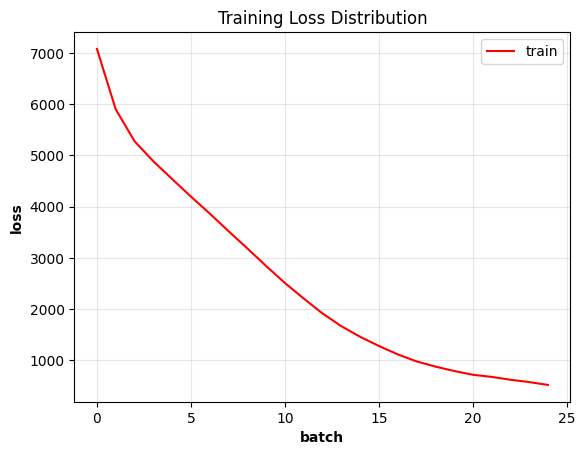

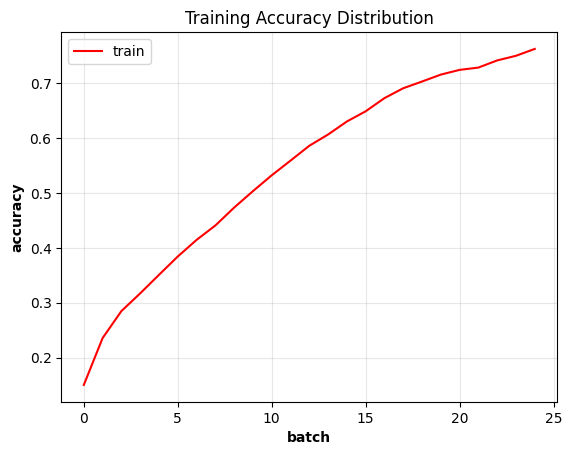

In [ ]:
t_emulator_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

##### **Mind Reading Emulator Model**
This model takes in the teacher states as input and predicts the output.

In [ ]:
mr_emulator_model.train(train_handler = datahandler_train, test_handler = datahandler_test, limit = 0.99)

### **Prediction Demo**
Here we generate our custom test case to see results for each model. We include both the **thought emulator** and **mind reading emulator** to see how well it maps to states.

---

In [ ]:
teacher_model.predict(custom_prediction)

100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

Input:  0 1 * 5 0 $$$ 9 0 * 8 9 
Target:  0 5 0 + 0 0 0 0 $$$ 2 7 0 + 0 1 8 0  #### 0 5 0 0 $$$ 2 8 8 0 
Predicted:  0 0 0 + 0 0 0 0 0 $$$ 0 0 0 + 0 0 0 0  #### 0 0 0 0 $$$ 0 0 0 0 



In [ ]:
t_emulator_model.predict(custom_prediction)

100%|██████████| 1/1 [00:00<00:00, 14.75it/s]

tensor([  657,   352,  1635,   642,   657,   720, 13702,   860,   657,  1635,
          807,   860,   220, 50256,   657,   642,   657,  1343,   657,   657,
          657,   657,   720, 13702,   362,   767,   657,  1343,   657,   352,
          807,   657,   220, 50256], device='cuda:0')
Input:  0 1 * 5 0 $$$ 9 0 * 8 9  
Target H. Layer 1, V. Layer 1, first 9 states:
[ 0.325  -0.0419  0.9007 -0.2563 -0.3507  0.2178 -1.2929 -0.3146 -0.3506]
Predicted H. Layer 1, V. Layer 1, first 9 states: 
[ 0.3326 -0.0895  1.0579 -0.3567 -0.4421  0.3444 -1.3945 -0.2332 -0.2096]
